In [2]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

In [ ]:
N = 10000
x = np.linspace(-1, 1, N)
y = lambda x: np.sin(x)*np.sin(x)

fig, ax = plt.subplots(2,2,figsize=(20,10))

# sin, sin^2
ax[0,0].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[0,0].set_xticklabels([])
ax[0,0].plot(x, np.sin(2*np.pi*x), label=r'$\sin(2\pi t)$')
ax[0,0].plot(x, np.sin(2*np.pi*x)*np.sin(2*np.pi*x), label=r'$\sin(2\pi t)^2$')
ax[0,0].legend()

ax[0,1].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[0,1].set_xticklabels([])
saw = lambda x: 2 * (x - np.floor(1/2 + x))
ax[0,1].plot(x, saw(x), label=r'$y_{saw}(t)$')
ax[0,1].plot(x, np.sin(2*np.pi*x)*saw(x), label=r'$y_{saw}(t) \cdot \sin(2\pi t)$')
ax[0,1].legend()

ax[1,0].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[1,0].set_xticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])
ax[1,0].plot(x, np.cos(2*np.pi*x), label=r'$\cos(2\pi t)$')
ax[1,0].plot(x, np.sin(2*np.pi*x)*np.cos(2*np.pi*x), label=r'$\cos(2\pi t) \cdot \sin(2\pi t)$')
ax[1,0].legend()

ax[1,1].set_xticks(np.arange(-1, 1+0.01, 0.5))
ax[1,1].set_xticklabels([r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$'])
saw = lambda x: np.abs(x)
ax[1,1].plot(x, saw(x), label=r'$|x|$')
ax[1,1].plot(x, np.sin(2*np.pi*x)*saw(x), label=r'$|x| \cdot \sin(2\pi t)$')
ax[1,1].legend()
fig.suptitle(r'Product $y(t) \cdot \sin(2\pi t)$ for different $y(t)$.')

fig.savefig('../figs/sounddesign/math/sin_product.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

In [ ]:
def sawtooth(f, n):
    t = np.linspace(0, 1, n)
    amp = 2 * (f*t - np.floor(1/2 + f*t))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, amp)
    #ax.set_aspect(1.0)
sawtooth(1, 100)

In [ ]:
N = 100000
n = 8
def sawtooth_ap(t, n):
    result = 0
    for k in range(1, n+1, 1):
        result += np.sin(TWO_PI * k * t) / k
    return result
        
t = np.linspace(0, 1, N)
amp = sawtooth_ap(t, n)
k = int((n+1)**0.5)
fig, ax = plt.subplots(k,k,figsize=(20,10))
ax[0,0].plot(t, amp)

index = 0
for i in range(k):
    for j in range(k):
        if i < k-1:
            ax[i,j].set_xticklabels([])
        if i != 0 or j != 0:
            index += 1
            ax[i,j].plot(t, np.sin(TWO_PI * index * t))
            y=amp*np.sin(TWO_PI * index * t)
            ax[i,j].plot(t, y)
            ax[i,j].fill_between(t, cumtrapz(y=y, x=t, initial=0))
            print(sum(amp*np.sin(TWO_PI * index * t) / N))
            #ax[i,j].axhline(y=sum(amp*np.sin(TWO_PI * index * t) / index / N), linestyle='--')
fig.savefig('../figs/sounddesign/math/saw_analysis.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)


In [ ]:
1/19

In [ ]:
N = 100000
n = 8
        
t = np.linspace(0, 1, N)
k = int((n+1)**0.5)
fig, ax = plt.subplots(k,k,figsize=(20,10))

index = 0
for i in range(1,k+1):
    for j in range(1,k+1):
        index += 1
        alpha = 0
        beta = 0
        ax[i-1,j-1].plot(t, np.sin(TWO_PI * (i * t - alpha)), label=f'$i={{{i}}}$', linestyle='--')
        ax[i-1,j-1].plot(t, np.sin(TWO_PI * (j * t - beta)), label=f'$j={{{j}}}$', linestyle='--')
        ax[i-1,j-1].plot(t, np.sin(TWO_PI * (j * t - beta)) * np.sin(TWO_PI * (i * t - alpha)))
        if i < k:
            ax[i-1,j-1].set_xticklabels([])
        #ax[i-1,j-1].plot(t, cumtrapz(y=np.sin(TWO_PI * (j * t - beta)) * np.sin(TWO_PI * (i * t - alpha)), x=t, initial=0))
        #ax[i-1,j-1].legend()
        ax[i-1,j-1].set_title(f'$i={{{i}}}, j={{{j}}}$')
        #print(sum(np.sin(TWO_PI * (j * t - beta)) * np.sin(TWO_PI * (i * t - alpha))/N))
            #ax[i,j].axhline(y=sum(amp*np.sin(TWO_PI * index * t) / index / N), linestyle='--')
fig.savefig('../figs/sounddesign/math/sine_perp.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

# DFT Example 1

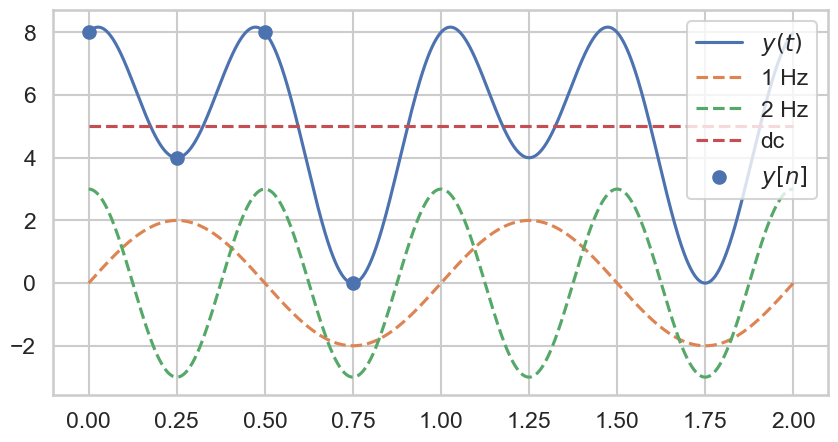

In [3]:
N = 4
y1 = lambda t: 2 * np.cos(2*np.pi*t - np.pi/2)
y2 = lambda t: 3 * np.cos(4*np.pi*t)
dc = lambda t: np.ones(len(t))*5
y = lambda t: dc(t) + y1(t) + y2(t)

t = np.linspace(0, 2, 1000)
n = np.linspace(0, 1, N+1)[:-1]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, y(t), label=r'$y(t)$')
ax.plot(t, y1(t), label=r'1 Hz', linestyle='--')
ax.plot(t, y2(t), label=r'2 Hz', linestyle='--')
ax.plot(t, dc(t), label=r'dc', linestyle='--')
ax.scatter(n, y(n), label=r'$y[n]$', marker='o')
ax.legend()
fig.savefig('../figs/sounddesign/math/dft_example.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

In [4]:
def dft(y, k):
    N = len(y)
    result = 0
    for n in range(N):
        result += y[n] * np.exp(-1j * 2*np.pi/N * n * k)
    return result

def idft(c, n):
    N = len(c)
    result = 0
    for k in range(N):
        result += c[k] * np.exp(1j * 2*np.pi/N * k * n)
    return 1/N * result

In [5]:
y_n = y(n)

In [6]:
c_k = [dft(y_n, k) for k in range(len(y_n))]
c_k

[(20+0j),
 -4.000000000000001j,
 (12+1.4695761589768238e-15j),
 (-8.881784197001252e-16+3.999999999999997j)]

In [7]:
np.arctan2([4],[0])

array([1.57079633])

In [ ]:
phases = np.arctan2([val.imag for val in c_k], [val.real for val in c_k])
magnitudes = np.abs(np.array(c_k))

In [ ]:
fig, ax = plt.subplots(figsize=(8,3), nrows=1, ncols=2)
f = np.array([0, 1, 2, 3])
ax[0].scatter(f, magnitudes, label=r'$|c[n]|$')
ax[0].set_ylim((0,20.5))
ax[0].set_xticks(f)
ax[0].set_yticks([0, 5, 10, 15, 20])
ax[0].set_xlabel(r'f (Hz)')
ax[0].set_ylabel(r'$|c[n]|$');

ax[1].scatter(f, phases, label=r'$|c[n]|$')
ax[1].set_ylim((-np.pi,np.pi))
ax[1].set_xticks(f)
ax[1].set_yticks([-np.pi, -3/4 * np.pi, -1/2*np.pi, -1/4*np.pi, 0, 1/4*np.pi, 1/2*np.pi, 3/4 * np.pi, np.pi])
ax[1].set_yticklabels([r'$-\pi$',r'$-3/4\pi$', r'$-1/2 \pi$', r'$-1/4 \pi$', r'0', r'$1/4 \pi$', r'$1/2 \pi$', r'$3/4 \pi$', r'$\pi$'])
ax[1].set_xlabel(r'f (Hz)')
ax[1].set_ylabel(r'$\theta$ (radian)');

In [ ]:
y_app = lambda t: 1/N  * magnitudes[0] + (1/N * magnitudes[1] + 1/N * magnitudes[3]) * np.cos(2 * np.pi * t + phases[1]) + 1/N * magnitudes[2] * np.cos(2 * 2 * np.pi * t + phases[2])

In [ ]:
iy_n = [idft(c_k, n) for n in range(len(c_k))]
iy_n

In [ ]:
N = 16
f = 3/4
f_s = 1/N
y_f = lambda k, t: np.sin(k/N * 2 * np.pi * t)
y_one = lambda t: 14/N * np.cos(1/N * 2 * np.pi * t + 2.16259125)
    
y = lambda t: np.sin(f * 2 *np.pi * t / N)
y2 = lambda t: np.sin(f * 2 * np.pi * (t%16) / N)
t = np.linspace(0, 2*N*4/3, 1000)
t2 = np.linspace(0, N, 1000)
n = np.linspace(0, N, N+1)[:-1]

y_n = y(n)
c_k = [dft(y_n, k) for k in range(len(y_n))]

iy_n = [idft(c_k, n) for n in range(len(c_k))]
iy_n = [val.real for val in iy_n]

phases = np.arctan2([val.imag for val in c_k], [val.real for val in c_k])
magnitudes = np.abs(np.array(c_k))

def idft_fuction(t):
    s = 0
    for i in range(len(magnitudes)//2):
        if i == 0:
            s += (1/N * magnitudes[-i]) * np.cos(i/N * 2 * np.pi * t + phases[i])
        else:
            s += (1/N * magnitudes[i] + 1/N * magnitudes[-i]) * np.cos(i/N * 2 * np.pi * t + phases[i])
    
    i = len(magnitudes)//2
    s +=  (1/N * magnitudes[-i]) * np.cos(i/N * 2 * np.pi * t + phases[i])
    return s

y_idft = [idft_fuction(ti) for ti in t]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t, y(t), label=r'$y(t)$')
ax.plot(t, y2(t), label=r'$y_{dft}(t)$', linestyle='--')
ax.scatter(n, y(n), label=r'$y[n]$', marker='o', alpha=0.5)
ax.scatter(n, iy_n, label=r'$y_{idft}[n]$', marker='x', c='black')
ax.plot(t, y_idft, label=r'$y_{idft}(t)$', c='black')
ax.legend()
fig.savefig('../figs/sounddesign/math/dft_example.jpeg', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

In [ ]:
len(magnitudes)//2

In [ ]:
y_n = y(n)
c_k = [dft(y_n, k) for k in range(len(y_n))]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6), nrows=2, ncols=1, sharex=True)
f = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
ax[0].scatter(f, np.abs(np.array(c_k)), label=r'$|c[n]|$')
ax[0].set_ylim((0,7.5))
ax[0].set_xticks(f)
ax[0].set_yticks([0, 3.5/2, 3.5, 3.5+3.5/2, 7])
ax[0].set_ylabel(r'$|c[n]|$')
ax[1].scatter(f, np.arctan2([val.imag for val in c_k], [val.real for val in c_k]), label=r'$|c[n]|$')
ax[1].set_ylim((-np.pi,np.pi))
ax[1].set_xticks(f)
ax[1].set_yticks([-np.pi, -3/4 * np.pi, -1/2*np.pi, -1/4*np.pi, 0, 1/4*np.pi, 1/2*np.pi, 3/4 * np.pi, np.pi])
ax[1].set_yticklabels([r'$-\pi$',r'$-3/4\pi$', r'$-1/2 \pi$', r'$-1/4 \pi$', r'0', r'$1/4 \pi$', r'$1/2 \pi$', r'$3/4 \pi$', r'$\pi$'])
ax[1].set_xlabel(r'f (Hz)')
ax[1].set_ylabel(r'$\theta$ (radian)');

In [ ]:
np.arctan2([val.imag for val in c_k], [val.real for val in c_k])

# FFT